  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Total progress: 80it [00:36,  2.17it/s]
text: It was a knife, and she was holding it in a threatening manner.
index: 12


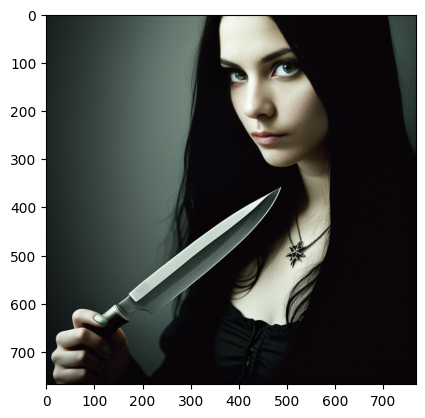

In [1]:
from scripts_2 import chased_by_evil
from scripts_2.utilities import split_text_to_dict
import nbconvert
import os
import subprocess
import torch
ROOT_FOLDER = 'F:/gg/'
os.chdir(ROOT_FOLDER)
OLD_VERSION = False

#first step - import the data
PROJECT = chased_by_evil.chased_by_evil

#second step - generate audio and init images
VOICE_GEN_ACTIVATE = False # generate voice from text ./voice_gen.ipynb
GENERATE_INIT_IMG = True #init img - delete file 0000000.png in folder to pass and the whole folder to process again

#third step - merge audio and gen srt, generate lip, 
MERGE_AUDIO_AND_GEN_SRT = False

#fourth step - lip sinc
LIP_SYNC_ACTIVATE = False

#third step - merge audio and gen srt, generate lip, 
GENERATE_ANIMATIONS_DEFORUM = False #music generation or test with stable online
SHOW_WEB_UI = True # Use deforum with WEBUI

GEN_DEPTH = False
GENERATE_OBJ = False

GEN_ALPHA_ACTIVATE = False
MERGE_ALPHA_BACK = False

if GENERATE_ANIMATIONS_DEFORUM:
   DEFORUM =  True  #generate templates   
   INTERPOLATE_VIDEO = False
else:
   DEFORUM =  False
   INTERPOLATE_VIDEO = False




PROJECT_NAME = PROJECT['music_name'][0]

# USABLES BELOW

GET_ARRAY_TXT_ACTIVATE = False # Format the text ./get_array_txt.ipynb #implement later

IMAGE_GEN_ACTIVATE = False
IMG2IMG_ACTIVATE = False
STYLE_GEN_ACTIVATE = False
FRAME_INTER_GEN_ACTIVATE = False
VIDEO_HD_GEN_ACTIVATE = False #old version
SRT_GEN_ACTIVATE = False
FIRST_ORDER_ACTIVATE = False

GENERATE_FULL_LQ_VIDEO = False

DUPLICATE_TEMPLATES_AND_HD_ACTIVATE = False # duplicate templates from animations and background and improve quality
IMG_HD_GEN_ACTIVATE = False
MERGE_AUDIO_ACTIVATE = False
LIP_SYNC_HD_ACTIVATE = False
ALPHA_ACTIVATE = False # Take img from lip_hd, remove the alpha and save in alpha, then merge with the bg in background gg folder and save it
MERGE_VIDEO_ACTIVATE = False
INTRO = True
INTRO_LENGTH = 3



# EXCLUDE_IMG_GEN =  [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,19,21,22,23] # will not generate this indexes
EXCLUDE_IMG_GEN =  []
EXCLUDE_VIDEO_GEN =  [] # will not generate this indexes
RECORD_AUDIO_AFTER = -1 # skilp until this number
RECORD_VIDEO_AFTER = -1
RECORD_FRAME_INTER_AFTER = -1 # -1 will start from the beginning
RECORD_FRAME_INTER_HD_AFTER = -1 
RECORD_FRAME_LIP = -1
if OLD_VERSION:
   TEXT_VOICE_GEN = PROJECT['text_spoken']
else:
   if GENERATE_ANIMATIONS_DEFORUM:
      TEXT_VOICE_GEN = PROJECT['music_name']
   else:
      try:
         TEXT_VOICE_GEN = split_text_to_dict(PROJECT['text_spoken'][0])
      except:
         TEXT_VOICE_GEN = {"0": "dummy"}
   TEXT_IMAGE_GEN = PROJECT['image_generation']
   FRAMES_MUSIC = PROJECT['n_frames_music']
   """ TEXT_IMAGE_GEN = story.M000001['image_generation'] 
   TEXT_VOICE_GEN = story.M000001['music_name']
   FRAMES_MUSIC = story.M000001['n_frames_music'] """

GEN_VIDEO = True
IMG_NUMBER = 5
IMG_NUMBER_IMG2IMG = 10

FPS = 15
STATIC_BG = False
PROJECT_BACKGROUND = "230313 - castle"
LOCATION_STATIC_PNG = "F:/gg/background/1.png"

SHOW_OUTPUT = True
THUMBNAIL = "Thumbnail for a youtube video with the title: Jack and the Jewel - Amazing story."  
PROMPT_IMG =  "High definition, realistic, highly detailed, illustration, digital painting, artstation, smooth, sharp focus, concept art, elegant and without text of: "
PROMPT_IMG = "a beautiful cinematic render of anime, fine art, intricate, masterpiece, high definition, realistic, highly detailed, smooth, sharp focus, concept art, elegant"
PROMPT_IMG = "atmospheric, hyper realistic, epic composition, cinematic, octane render, alluring, appealing, charming, cute, dazzling, delicate, delightful, elegant, \
exquisite, fascinating, good-looking, gorgeous, graceful, grand, lovely, magnificent"
PROMPT_IMG = "(cyberpunk), (high definition), beautiful"
NEGATIVE_P = "ugly, morbid, cloned face, missing legs, tiling, extra fingers, mutation, bad anatomy,gross proportions, \
   missing arm, long neck, duplicate, poorly drawn hands, poorly drawn feet, poorly drawn face, out of frame, extra limbs, \
   disfigured, deformed, body out of frame, blurry, blurred, watermark, grainy, signature, cut off, draft, "
NEGATIVE_P = '(painting), (noise), (blur), (fog), (text), (NSFW)'
#SPEAKER = Naoto Shirogane; SPEAKER = "Celestia"; SPEAKER = "Engineer"; SPEAKER
#= "Starlight"; SPEAKER = "Yosuke Hanamura"; SPEAKER = "Ryotaro Dojima"; SPEAKER
#= "Kanji Tatsumi"; SPEAKER = "Sweetie Belle";

MUSIC_BACKGROUND_NAME = 'Unseen-Horrors.wav'

PERSON = False

if not PERSON:
   NEGATIVE_P = '(NSFW), (ugly), (noise), (blur), (fog), (text), painting,'
   NEGATIVE_P = '(NSFW), (semi-realistic, cgi, 3d, render, sketch, cartoon, drawing, anime:1.4), text, cropped, out of frame, worst quality, low quality, jpeg artifacts, ugly, duplicate, morbid, mutilated, extra fingers, mutated hands, poorly drawn hands, poorly drawn face, mutation, deformed, blurry, dehydrated, bad anatomy, bad proportions, extra limbs, cloned face, disfigured, gross proportions, malformed limbs, missing arms, missing legs, extra arms, extra legs, fused fingers, too many fingers, long neck'
   PROMPT_IMG = "(eerie), (detailed), (high definition),"
else:
   NEGATIVE_P = '(NSFW), (hands), (hand), (ugly), morbid, cloned face, missing legs, tiling, extra fingers, mutation, bad anatomy,gross proportions,missing arm, long neck, duplicate, poorly drawn hands, poorly drawn feet, poorly drawn face, out of frame, extra limbs,  disfigured, deformed, body out of frame, blurry, blurred, watermark, grainy, signature, cut off, draft,'
   #PROMPT_IMG = '(portrait), (front view picture), (high definition), (beautiful)'
   PROMPT_IMG = '(high definition), (beautiful)'
   """ TEXT_IMAGE_GEN = [
      {
         "0": "beautiful woman , rave party in the background",
         "90": "man"
      } 
   ]"""

TITLE_INTRO = PROJECT['title'][0]

SPEAKER = "Engineer"  
TALKING_SPEED = 1 
STYLES_FOLDER = ".\\styles"
SECONDS_SILENCE = 0.75
SKIP_VIDEO = []
MERGE_VIDEO = True
MODEL_14 = False
LANGUAGES = ['pt','fr','de','hi','it','ja','es','id']
INSERT_BACKGROUND = False
SAVE_FOLDER = "F:\\gg\\templates\\to_proccess"

if MODEL_14:
   WIDTH = 512
   HEIGHT = 512
else:
   WIDTH = 768
   HEIGHT = 768

%store WIDTH
%store HEIGHT
%store TEXT_IMAGE_GEN
%store TEXT_VOICE_GEN
%store IMG_NUMBER
%store SAVE_FOLDER
%store PROJECT_NAME
%store SHOW_OUTPUT
%store THUMBNAIL
%store PROMPT_IMG
%store SPEAKER
%store TALKING_SPEED
%store STYLES_FOLDER
%store SECONDS_SILENCE
%store EXCLUDE_IMG_GEN
%store SKIP_VIDEO
%store MERGE_VIDEO
%store NEGATIVE_P
%store MODEL_14
%store LANGUAGES
%store GEN_VIDEO
%store INSERT_BACKGROUND
%store RECORD_AUDIO_AFTER
%store RECORD_VIDEO_AFTER
%store RECORD_FRAME_INTER_AFTER
%store RECORD_FRAME_INTER_HD_AFTER
%store IMG_NUMBER_IMG2IMG
%store RECORD_FRAME_LIP
%store FPS
%store STATIC_BG
%store LOCATION_STATIC_PNG
%store PROJECT_BACKGROUND
%store FRAMES_MUSIC
%store PROJECT
%store ROOT_FOLDER
%store MUSIC_BACKGROUND_NAME
%store GENERATE_OBJ
%store TITLE_INTRO
%store INTRO
%store INTRO_LENGTH


if VOICE_GEN_ACTIVATE:
    %run ./voice_gen.ipynb

if GENERATE_INIT_IMG:
   os.chdir('F:/gg/stable/')  
   %run launch.py --xformers --enable-insecure-extension-access --hide_web_ui --skip-python-version-check
   %run ./modules/txt2img.ipynb
   os.chdir('F:/gg/')    
   #%run launch.py --share --xformers --enable-insecure-extension-access
   
if MERGE_AUDIO_AND_GEN_SRT:
   %run ./merge_audio_gen_srt.ipynb

if LIP_SYNC_ACTIVATE:
   %run ./lip/lip.ipynb 

if DEFORUM:
   #os.chdir('./stable/')
   os.chdir('F:/gg/stable/')  
   if SHOW_WEB_UI:
      %run launch.py --xformers --enable-insecure-extension-access
   else:
      %run launch.py --xformers --enable-insecure-extension-access --hide_web_ui --skip-python-version-check
      %run ./extensions/deforum/scripts/deforum.ipynb

      #%run ./adjust_video.ipynb
   os.chdir('F:/gg/')    
   #%run launch.py --share --xformers --enable-insecure-extension-access

if IMAGE_GEN_ACTIVATE:
    %run ./generate_video.ipynb

if GEN_DEPTH:
   os.chdir('F:/gg/stable/')
   %run launch.py --xformers --enable-insecure-extension-access --hide_web_ui --skip-python-version-check
   %run ./extensions/stable-diffusion-webui-depthmap-script/scripts/depthmap.ipynb
   os.chdir('F:/gg/')  

if IMG2IMG_ACTIVATE:
   %run ./img2img.ipynb

if STYLE_GEN_ACTIVATE:
   %run ./style_transfer.ipynb

if FRAME_INTER_GEN_ACTIVATE:
   %run ./frame_inter.ipynb

if VIDEO_HD_GEN_ACTIVATE:
   %run ./high_res_video.ipynb

if SRT_GEN_ACTIVATE:
   %run ./create_srt.ipynb

if FIRST_ORDER_ACTIVATE:
   # %run ./first_order/first-order-model/demo.py --config first_order/first-order-model/config/vox-256.yaml --driving_video first_order/final.mp4 --source_image first_order/result0.jpg --checkpoint first_order/first-order-model/checkpoint/vox-cpk.pth.tar --relative --adapt_scale
   %run ./first_order/first-order-model/first_order.ipynb


if GENERATE_FULL_LQ_VIDEO:
   # %run ./deforum/run.ipynb --enable_animation_mode --settings
   # "./deforum/runSettings_Template.txt" --model "v1-5-pruned-emaonly.ckpt"
   %run ./deforum/run.ipynb





if INTERPOLATE_VIDEO:
   os.chdir('F:/gg/stable/')
   %run launch.py --xformers --enable-insecure-extension-access --hide_web_ui --skip-python-version-check
   %run ./extensions/deforum/scripts/interpolate.ipynb
   os.chdir('F:/gg/')

if IMG_HD_GEN_ACTIVATE:
   %run ./highRes.ipynb



if MERGE_AUDIO_ACTIVATE:
   %run ./merge_audio.ipynb



if LIP_SYNC_HD_ACTIVATE:
   %run ./lip_hd.ipynb 

if ALPHA_ACTIVATE:
   %run ./get_alpha.ipynb

if GEN_ALPHA_ACTIVATE:
   %run ./generate_alpha.ipynb

if MERGE_ALPHA_BACK:
   %run ./merge_alpha_back.ipynb


if MERGE_VIDEO_ACTIVATE:
   %run ./merge_video.ipynb 

if DUPLICATE_TEMPLATES_AND_HD_ACTIVATE:
   %run ./duplicate_redim.ipynb
   """    cmd = ["python", "duplicate_redim.py", "--exclude-img-gen", EXCLUDE_IMG_GEN]
   p = subprocess.Popen(cmd)
   p.wait() """
   


